In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data = pd.read_parquet("data.parquet")

In [25]:
data

,WfeRms,SegmentPiston,DetectorFrame
0,[7.963266712707195e-10],"[-2.933538689742221e-10, -2.9330793349657824e-...","[712962.2, 835863.94, 3562905.2, 5736370.5, 54..."
1,[7.963266712707195e-10],"[-2.933538689742221e-10, -2.9330793349657824e-...","[1425924.4, 1671727.9, 7125810.5, 11472741.0, ..."
2,[7.963266712707195e-10],"[-2.933538689742221e-10, -2.9330793349657824e-...","[2138886.5, 2507591.8, 10688716.0, 17209112.0,..."
3,[7.963266712707195e-10],"[-2.933538689742221e-10, -2.9330793349657824e-...","[2851848.8, 3343455.8, 14251621.0, 22945482.0,..."
4,[7.963266712707195e-10],"[-2.933538689742221e-10, -2.9330793349657824e-...","[3564811.0, 4179319.8, 17814526.0, 28681852.0,..."


In [26]:
data['DetectorFrame'][0].shape

(4096,)

In [27]:
np.vstack(data['SegmentPiston']).shape


(5, 7)

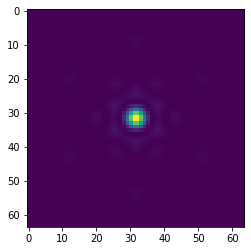

In [29]:
plt.imshow(data['DetectorFrame'][0].reshape(64,-1))
